In [99]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [100]:
aaa = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/aaa.pkl')
bbb = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/bbb.pkl')
ccc = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/ccc.pkl')

In [101]:
aaa[aaa.time == pd.to_datetime('2019-02-19 00:00:00')]

,time,solar1,solar2,real_time_power,day_power,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
42233,2019-02-19,0,0,0.0,0.0,2,19,0,0,-1.0,4.0,70.0,0.0,0.0,100.0,4.8,1,-62.38,334.01,58.0


In [102]:
bbb[bbb.time == pd.to_datetime('2019-02-19 00:00:00')]

,time,solar1,solar2,real_time_power,day_power,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
39025,2019-02-19,0,0,0.0,0.0,2,19,0,0,-1.0,4.0,70.0,0.0,0.0,100.0,4.8,1,-62.38,334.01,58.0


In [103]:
ccc[ccc.time == pd.to_datetime('2019-02-19 00:00:00')]

,time,solar1,solar2,real_time_power,day_power,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
31196,2019-02-19,1.85588,0,0.031494,0.0,2,19,0,0,-1.0,4.0,70.0,0.0,0.0,100.0,4.8,1,-62.38,334.01,58.0


In [104]:
aaa_original = aaa.copy()
bbb_original = bbb.copy()
ccc_original = ccc.copy()

aaa = aaa[:42233].copy()
bbb = bbb[:39025].copy()
ccc = ccc[:31196].copy()

In [105]:
def model_rf(X, y, test_dataset, site):
    
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X)
    test_dataset = sc.transform(test_dataset)
    y_train = y
#     y_train = sc.fit_transform(y)

    
    rfModel = RandomForestRegressor(n_estimators=25, max_features=15, max_depth=25,# min_samples_split=3,min_samples_leaf=2,
                                    verbose=1, random_state=0)
    rfModel.fit(X_train, y_train)

    y_pred = rfModel.predict(test_dataset)
    
#     y_pred = sc.inverse_transform(y_pred.reshape(y_pred.shape[0], 1))
    print(len(y_pred))
    return rfModel,y_pred

In [106]:
forecast_final = pd.read_pickle('C:/Users/ewpadmin/KMS/forecast_final.pkl')

In [107]:
# forecast_final.drop(columns='time', inplace=True)
# aaa.drop(columns='wind_direction', inplace=True)
# bbb.drop(columns='wind_direction', inplace=True)
# ccc.drop(columns='wind_direction', inplace=True)
# forecast_final.drop(columns='wind_direction', inplace=True)

In [108]:
# aaa.drop(columns='Elevation_angle', inplace=True)
# bbb.drop(columns='Azimuth_angle', inplace=True)
# ccc.drop(columns='Elevation_angle', inplace=True)
# aaa.drop(columns='Azimuth_angle', inplace=True)
# bbb.drop(columns='Elevation_angle', inplace=True)
# ccc.drop(columns='Azimuth_angle', inplace=True)

In [109]:
df_name = [aaa, bbb, ccc]
for col in df_name:
    col.Elevation_angle = col.Elevation_angle.astype('category')
    col.Azimuth_angle = col.Azimuth_angle.astype('category')

In [110]:
forecast_final.columns

Index(['time', 'month', 'day', 'hour', 'minute', 'temperature_3H', 'sky',
       'rainfall_probability', 'rainfall', 'snow', 'humidity', 'wind_speed',
       'wind_direction', 'Elevation_angle', 'Azimuth_angle', 'dust_132'],
      dtype='object')

In [111]:
forecast_final.rainfall = forecast_final.rainfall.abs()
forecast_final.snow = forecast_final.snow.abs()

In [112]:
forecast_final.head(3)

,time,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
0,2019-02-19 09:00:00,2,19,9,0,-1.0,4.0,70.0,2.3,2.3,100.0,4.0,1.0,17.92,120.31,33.000000
1,2019-02-19 09:15:00,2,19,9,15,-1.0,4.0,64.8,2.0,2.0,100.8,3.9,1.0,20.47,123.12,32.993138
2,2019-02-19 09:30:00,2,19,9,30,-1.0,4.0,59.9,1.8,1.8,101.5,3.9,1.0,22.93,126.05,32.987523


In [113]:
col_list = ['month', 'day', 'hour', 'minute', 'temperature_3H', 'sky', 'rainfall_probability', 'rainfall', 'snow',
            'humidity', 'wind_speed', 'wind_direction', 'dust_132', 'Elevation_angle', 'Azimuth_angle']

In [114]:
aaa.columns[3], aaa.columns[4]

('real_time_power', 'day_power')

In [115]:
aaa.dtypes

time                    datetime64[ns]
solar1                          object
solar2                          object
real_time_power                float64
day_power                      float64
month                         category
day                           category
hour                          category
minute                        category
temperature_3H                 float64
sky                            float64
rainfall_probability           float64
rainfall                       float64
snow                           float64
humidity                       float64
wind_speed                     float64
wind_direction                category
Elevation_angle               category
Azimuth_angle                 category
dust_132                       float64
dtype: object

In [116]:
forecast_final.dtypes

time                    datetime64[ns]
month                            int64
day                              int64
hour                             int64
minute                           int64
temperature_3H                 float64
sky                            float64
rainfall_probability           float64
rainfall                       float64
snow                           float64
humidity                       float64
wind_speed                     float64
wind_direction                 float64
Elevation_angle                float64
Azimuth_angle                  float64
dust_132                       float64
dtype: object

### real_time_power

In [117]:
modela,pre_aaa = model_rf(aaa[col_list], aaa[[aaa.columns[3]]], forecast_final[col_list], 'A_site')
modelb,pre_bbb = model_rf(bbb[col_list], bbb[[bbb.columns[3]]], forecast_final[col_list], 'B_site')
modelc,pre_ccc = model_rf(ccc[col_list], ccc[[ccc.columns[3]]], forecast_final[col_list], 'C_site')

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


253


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


253
253


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [118]:
# modela,pre_aaa = model_rf(aaa[col_list], aaa[[aaa.columns[3]]], aaa_original[col_list][42233:], 'A_site')
# modelb,pre_bbb = model_rf(bbb[col_list], bbb[[bbb.columns[3]]], bbb_original[col_list][39025:], 'B_site')
# modelc,pre_ccc = model_rf(ccc[col_list], ccc[[ccc.columns[3]]], ccc_original[col_list][31196:], 'C_site')

<BarContainer object of 15 artists>

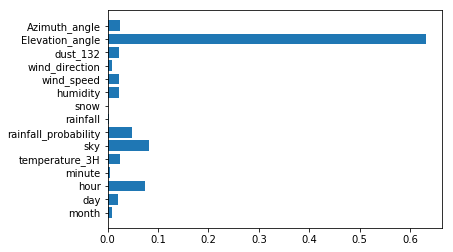

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
yyyy = modela.feature_importances_
plt.barh(col_list,yyyy)

In [120]:
pred_idx = pd.date_range(start='2019-02-19 09:00:00', end='2019-02-22 00:00:00', freq='15Min')
len(pd.date_range(start='2019-02-19 09:00:00', end='2019-02-22 00:00:00', freq='15Min'))

253

In [121]:
# pred_idx = pd.date_range(start='2019-02-19 00:00:00', end='2019-02-23 23:45:00', freq='15Min')
# len(pd.date_range(start='2019-02-19 00:00:00', end='2019-02-23 23:45:00', freq='15Min'))

In [122]:
predict = pd.concat([pd.DataFrame(pre_aaa, columns=['A_site'], index=pred_idx),
                     pd.DataFrame(pre_bbb, columns=['B_site'], index=pred_idx),
                     pd.DataFrame(pre_ccc, columns=['C_site'], index=pred_idx)], axis=1)

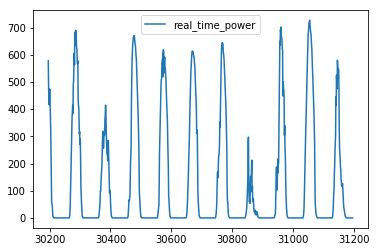

In [123]:
temp = ccc[[ccc.columns[3]]].iloc[-1000:,:]
temp.plot()

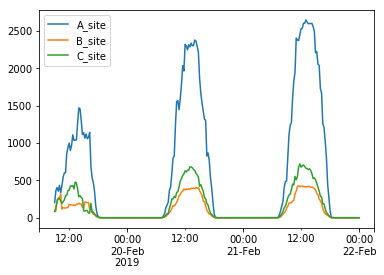

In [124]:
%matplotlib inline
predict.plot()

In [125]:
predict.head(50)

,A_site,B_site,C_site
2019-02-19 09:00:00,200.819109,81.499660,83.849188
2019-02-19 09:15:00,360.306664,92.352632,135.127326
2019-02-19 09:30:00,403.226634,238.482918,213.397899
2019-02-19 09:45:00,354.329311,250.679436,263.826760
2019-02-19 10:00:00,433.426283,270.596534,254.054978
2019-02-19 10:15:00,331.945501,311.363543,228.853030
2019-02-19 10:30:00,427.861864,114.491750,192.083583
2019-02-19 10:45:00,540.950289,132.360852,216.292757
2019-02-19 11:00:00,599.054297,131.489313,238.260354
2019-02-19 11:15:00,601.700252,127.135993,294.058425


In [126]:
ccc_original[ccc_original.time == pd.to_datetime('2019-02-19 09:00:00')]

,time,solar1,solar2,real_time_power,day_power,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
31232,2019-02-19 09:00:00,32.1169,27.2903,8.294711,7.683641,2,19,9,0,2.0,4.0,30.0,0.0,0.0,90.0,4.2,7,17.92,120.31,26.0


In [127]:
ccc_original[ccc_original.time == pd.to_datetime('2019-02-22 00:00:00')]

,time,solar1,solar2,real_time_power,day_power,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
31484,2019-02-22,1.8,0,0.0,0.0,2,22,0,0,-1.0,2.0,10.0,0.0,0.0,100.0,2.6,0,-61.4,334.96,66.0


In [128]:
aaa_original.set_index(aaa_original.time, inplace=True)
bbb_original.set_index(bbb_original.time, inplace=True)
ccc_original.set_index(ccc_original.time, inplace=True)

In [129]:
A_site = pd.concat([pd.DataFrame(aaa_original[42269:42522].real_time_power),
           pd.DataFrame(predict.A_site)], axis=1)
A_site.columns = ['ACT', 'PRE']

B_site = pd.concat([pd.DataFrame(bbb_original[39061:39314].real_time_power),
           pd.DataFrame(predict.B_site)], axis=1)
B_site.columns = ['ACT', 'PRE']

C_site = pd.concat([pd.DataFrame(ccc_original[31232:31485].real_time_power),
           pd.DataFrame(predict.C_site)], axis=1)
C_site.columns = ['ACT', 'PRE']

(<matplotlib.axes._subplots.AxesSubplot at 0x1f3f85cec88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f38377e198>)

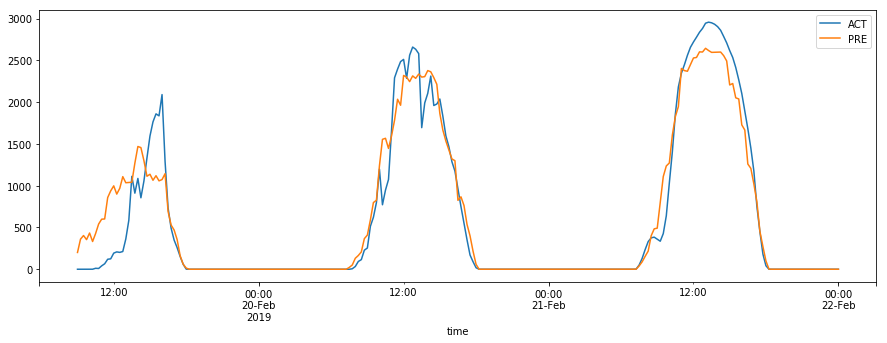

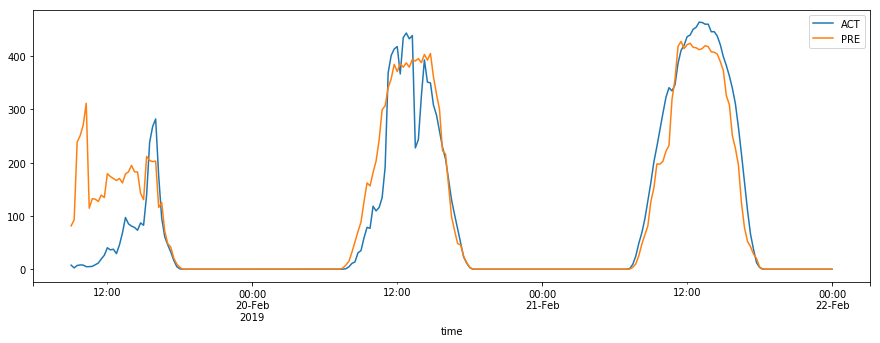

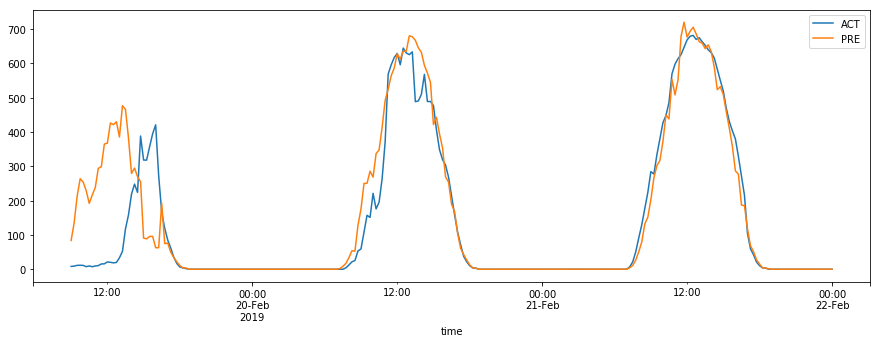

In [130]:
A_site.plot(figsize=(15,5)), B_site.plot(figsize=(15,5)), C_site.plot(figsize=(15,5))

In [97]:
pd.DataFrame(predict).to_excel('predict_real_time.xlsx')

### day_power

In [35]:
modela,pre_aaa = model_rf(aaa[col_list], aaa[[aaa.columns[4]]], forecast_final[col_list], 'A_site')
modelb,pre_bbb = model_rf(bbb[col_list], bbb[[bbb.columns[4]]], forecast_final[col_list], 'B_site')
modelc,pre_ccc = model_rf(ccc[col_list], ccc[[ccc.columns[4]]], forecast_final[col_list], 'C_site')

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


253


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


253
253


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [36]:
predict = pd.concat([pd.DataFrame(pre_aaa, columns=['A_site'], index=pred_idx),
                     pd.DataFrame(pre_bbb, columns=['B_site'], index=pred_idx),
                     pd.DataFrame(pre_ccc, columns=['C_site'], index=pred_idx)], axis=1)

In [37]:
predict.head(70)

,A_site,B_site,C_site
2019-02-19 09:00:00,538.624038,79.117866,138.519304
2019-02-19 09:15:00,563.414957,87.272941,101.738385
2019-02-19 09:30:00,632.148807,104.150448,120.741338
2019-02-19 09:45:00,657.030219,124.336941,143.228083
2019-02-19 10:00:00,821.553204,273.043172,190.739229
2019-02-19 10:15:00,856.953480,274.779614,200.414263
2019-02-19 10:30:00,904.005916,276.936496,282.317797
2019-02-19 10:45:00,955.733076,287.796554,280.427833
2019-02-19 11:00:00,1636.405924,278.888330,473.790075
2019-02-19 11:15:00,1721.346760,283.887625,489.643046


In [38]:
predict[predict.index < '2019-02-19 18:00:00']

,A_site,B_site,C_site
2019-02-19 09:00:00,538.624038,79.117866,138.519304
2019-02-19 09:15:00,563.414957,87.272941,101.738385
2019-02-19 09:30:00,632.148807,104.150448,120.741338
2019-02-19 09:45:00,657.030219,124.336941,143.228083
2019-02-19 10:00:00,821.553204,273.043172,190.739229
2019-02-19 10:15:00,856.953480,274.779614,200.414263
2019-02-19 10:30:00,904.005916,276.936496,282.317797
2019-02-19 10:45:00,955.733076,287.796554,280.427833
2019-02-19 11:00:00,1636.405924,278.888330,473.790075
2019-02-19 11:15:00,1721.346760,283.887625,489.643046


In [39]:
pd.DataFrame(predict).to_excel('predict_day_power.xlsx')